In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


<Axes: xlabel='fractal_dimension_worst', ylabel='count'>

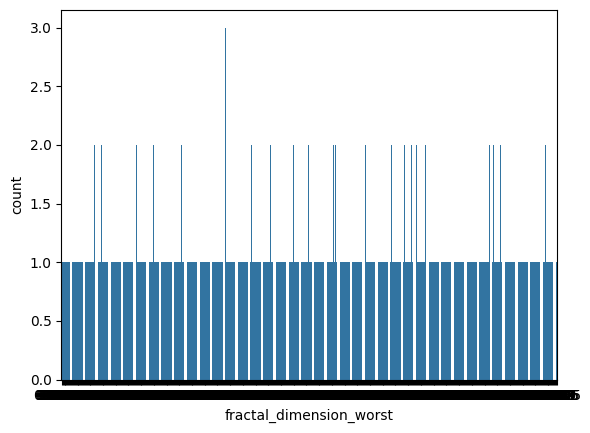

In [22]:
sns.countplot(x='fractal_dimension_worst',data=df)

<Axes: >

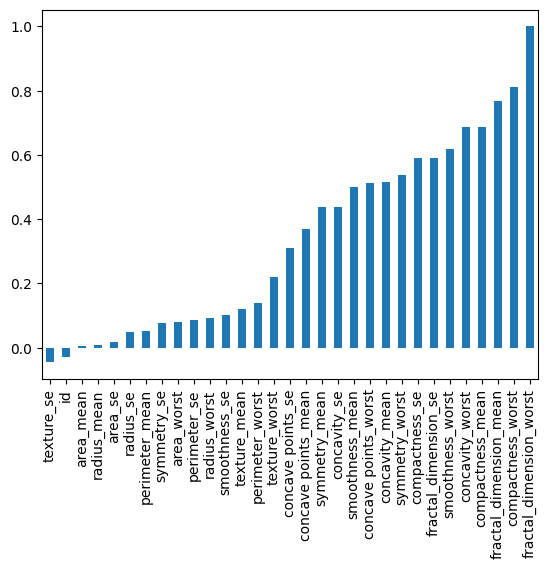

In [17]:
df.corr(numeric_only=True)['fractal_dimension_worst'][:-1].sort_values().plot(kind='bar')

<Axes: >

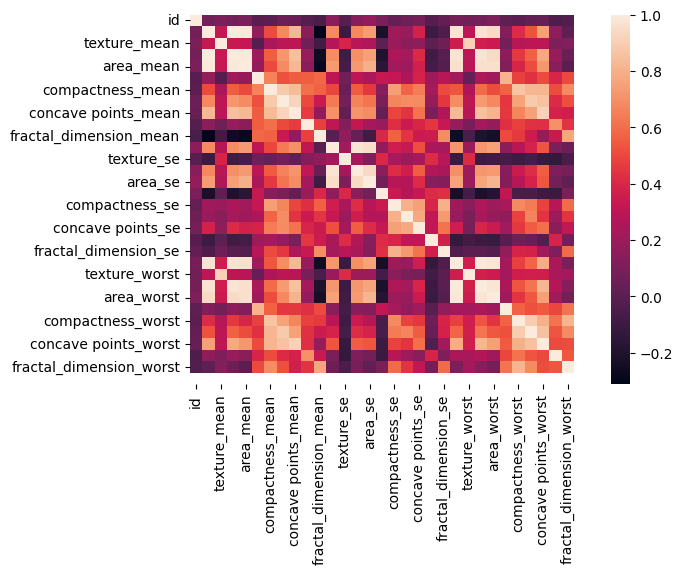

In [20]:
sns.heatmap(df.corr(numeric_only=True))

In [79]:
X=df.drop('fractal_dimension_worst',axis=1).values
y=df['fractal_dimension_worst'].values

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler=MinMaxScaler()

In [88]:
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,False,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,False,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,False,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,False,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,False,True
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,False,True
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,False,True
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,False,True


In [89]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,False,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,False,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,False,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,False,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,False,True


In [90]:
df['diagnosis_B'] = pd.to_numeric(df['diagnosis_B'], errors='coerce')

In [91]:
df


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,False,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,False,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,False,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,False,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,False,True
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,False,True
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,False,True
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,False,True


In [92]:
X_train=scaler.fit_transform(X_train)

C:\Users\sarad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\sarad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [93]:
X_test=scaler.fit_transform(X_test)

C:\Users\sarad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\sarad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [95]:
from tensorflow.keras.models import Sequential

In [96]:
from tensorflow.keras.layers import Dense,Dropout

In [97]:
X_train.shape

(381, 33)

In [102]:
model=Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#binary classificaion
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [103]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.6919 - val_loss: 0.6882
Epoch 2/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6869 - val_loss: 0.6833
Epoch 3/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6820 - val_loss: 0.6784
Epoch 4/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6771 - val_loss: 0.6736
Epoch 5/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6723 - val_loss: 0.6688
Epoch 6/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6676 - val_loss: 0.6641
Epoch 7/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6628 - val_loss: 0.6594
Epoch 8/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6581 - val_loss: 0.6548
Epoch 9/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6536 - val_loss: 0.6502
Epoch 10/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6491 - val_loss: 0.6457
Epoch 11/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6445 - val_loss: 0.6413
Epoch 12/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - los

In [104]:
losses=pd.DataFrame(model.history.history)

<Axes: >

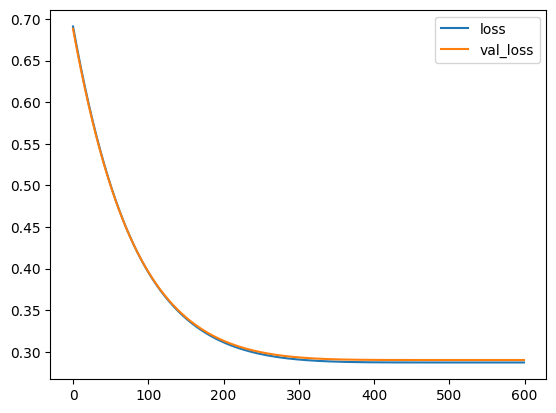

In [105]:
losses.plot()

In [106]:
model=Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#binary classificaion
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [107]:
from tensorflow.keras.callbacks import EarlyStopping

In [108]:
early_stop =EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [111]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2855 - val_loss: 0.2903
Epoch 2/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2865 - val_loss: 0.2903
Epoch 3/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2869 - val_loss: 0.2903
Epoch 4/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2886 - val_loss: 0.2903
Epoch 5/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2892 - val_loss: 0.2903
Epoch 6/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2858 - val_loss: 0.2903
Epoch 7/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2896 - val_loss: 0.2903
Epoch 8/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2900 - val_loss: 0.2903
Epoch 9/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2891 - val_loss: 0.2903
Epoch 10/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2859 - val_loss: 0.2903
Epoch 11/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2864 - val_loss: 0.2903
Epoch 12/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

In [112]:
model_loss=pd.DataFrame(model.history.history)

<Axes: >

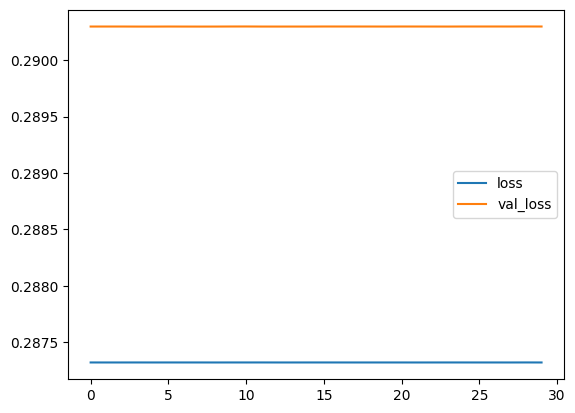

In [114]:
model_loss.plot()

In [118]:
from tensorflow.keras.layers import Dropout

In [122]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#binary classificaion
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [123]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.6919 - val_loss: 0.6882
Epoch 2/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6870 - val_loss: 0.6833
Epoch 3/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6821 - val_loss: 0.6784
Epoch 4/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6772 - val_loss: 0.6736
Epoch 5/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6723 - val_loss: 0.6688
Epoch 6/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6676 - val_loss: 0.6641
Epoch 7/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6628 - val_loss: 0.6594
Epoch 8/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6582 - val_loss: 0.6548
Epoch 9/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6535 - val_loss: 0.6502
Epoch 10/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6490 - val_loss: 0.6457
Epoch 11/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6445 - val_loss: 0.6413
Epoch 12/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

<Axes: >

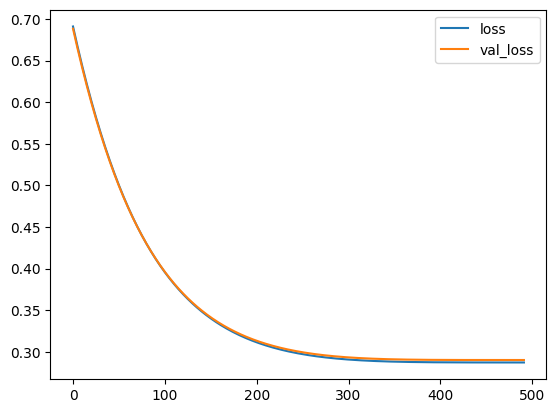

In [124]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [134]:
prediction=model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [131]:
from sklearn.metrics import classification_report,confusion_matrix

In [147]:

predictions = model.predict(X_test)

y_pred = (predictions > 0.5).astype(int).flatten()

y_true = y_test.flatten()

y_true = y_true.astype(int)



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [148]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



In [150]:
print(confusion_matrix(y_true, y_pred))

[[188]]


C:\Users\sarad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# TensorBoard

In [158]:
pwd

'C:\\Users\\sarad\\data science bootcamp'

In [159]:
from keras.callbacks import TensorBoard

In [160]:
from datetime import datetime

In [161]:
datetime.now().strftime("%Y-%m-%d--%H%M")

'2025-06-05--0040'

In [162]:
log_directory = 'logs\\fit'

In [163]:
board=TensorBoard(log_dir=log_directory,histogram_freq=1,
                   write_graph=True,
                   write_images=True,
                   update_freq='epoch',
                   profile_batch=2,
                   embeddings_freq=1)

In [164]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#binary classificaion
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [166]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop,board])

Epoch 1/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.2882 - val_loss: 0.2903
Epoch 2/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2881 - val_loss: 0.2903
Epoch 3/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2882 - val_loss: 0.2903
Epoch 4/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2906 - val_loss: 0.2903
Epoch 5/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2879 - val_loss: 0.2903
Epoch 6/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2906 - val_loss: 0.2903
Epoch 7/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2890 - val_loss: 0.2903
Epoch 8/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2844 - val_loss: 0.2903
Epoch 9/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2871 - val_loss: 0.2903
Epoch 10/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2887 - val_loss: 0.2903
Epoch 11/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2871 - val_loss: 0.2903
Epoch 12/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

In [167]:
print(log_directory)

logs\fit


In [168]:
pwd

'C:\\Users\\sarad\\data science bootcamp'